In [1]:
from ib_insync import IB, util
from ib_insync.contract import Future, ContFuture
from ib_insync.client import Client
import pandas as pd
import datetime

In [2]:
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 4002, clientId=12)

<IB connected to 127.0.0.1:4002 clientId=12>

In [3]:
contract = ContFuture('NQ', exchange='GLOBEX')

In [4]:
ib.qualifyContracts(contract)

[ContFuture(conId=321454967, symbol='NQ', lastTradeDateOrContractMonth='20190920', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU9', tradingClass='NQ')]

In [21]:
ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=False)

Error 321, reqId 12: Error validating request:-'bJ' : cause - Please enter a local symbol or an expiry, contract: ContFuture(symbol='NQ', exchange='GLOBEX')


[]

In [22]:
nq = Future('NQ', includeExpired=True)

In [26]:
all = ib.reqContractDetails(nq)

In [27]:
df = util.df(all)

In [28]:
len(df)

21

In [25]:
df.head()

,contract,marketName,minTick,orderTypes,validExchanges,priceMagnifier,underConId,longName,contractMonth,industry,...,callable,putable,coupon,convertible,maturity,issueDate,nextOptionDate,nextOptionType,nextOptionPartial,notes
0,"Contract(secType='FUT', conId=321454967, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,201909,,...,False,False,0,False,,,,,False,
1,"Contract(secType='FUT', conId=321454967, symbo...",NQ,0.25,"ALERT,ALLOC,AVGCOST,BASKET,BENCHPX,DAY,DEACT,D...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,201909,,...,False,False,0,False,,,,,False,
2,"Contract(secType='FUT', conId=334144585, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,201912,,...,False,False,0,False,,,,,False,
3,"Contract(secType='FUT', conId=334144585, symbo...",NQ,0.25,"ALERT,ALLOC,AVGCOST,BASKET,BENCHPX,DAY,DEACT,D...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,201912,,...,False,False,0,False,,,,,False,
4,"Contract(secType='FUT', conId=346577750, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,202003,,...,False,False,0,False,,,,,False,


In [ ]:
all_1 = []

In [32]:
df.iloc[-1].to_dict()

{'contract': Contract(secType='FUT', conId=371749745, symbol='NQ', lastTradeDateOrContractMonth='20200918', multiplier='20', exchange='QBALGO', currency='USD', localSymbol='NQU0', tradingClass='NQ'),
 'marketName': 'NQ',
 'minTick': 0.25,
 'orderTypes': 'ALERT,ALLOC,AVGCOST,BASKET,BENCHPX,DAY,DEACT,DEACTDIS,HID,ICE,LMT,MKT,NGCOMB,OPENCLOSE,WHATIF',
 'validExchanges': 'GLOBEX',
 'priceMagnifier': 1,
 'underConId': 11004958,
 'longName': 'E-mini NASDAQ 100 Futures',
 'contractMonth': '202009',
 'industry': '',
 'category': '',
 'subcategory': '',
 'timeZoneId': 'CST',
 'tradingHours': '20190913:0830-20190913:1515;20190914:CLOSED;20190915:CLOSED;20190916:0830-20190916:1515;20190917:0830-20190917:1515;20190918:0830-20190918:1515;20190919:0830-20190919:1515;20190920:0830-20190920:1515;20190921:CLOSED;20190922:CLOSED;20190923:0830-20190923:1515;20190924:0830-20190924:1515;20190925:0830-20190925:1515;20190926:0830-20190926:1515;20190927:0830-20190927:1515;20190928:CLOSED;20190929:CLOSED;20190

In [33]:
df.iloc[-2].to_dict()

{'contract': Contract(secType='FUT', conId=371749745, symbol='NQ', lastTradeDateOrContractMonth='20200918', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU0', tradingClass='NQ'),
 'marketName': 'NQ',
 'minTick': 0.25,
 'orderTypes': 'ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF',
 'validExchanges': 'GLOBEX',
 'priceMagnifier': 1,
 'underConId': 11004958,
 'longName': 'E-mini NASDAQ 100 Futures',
 'contractMonth': '202009',
 'industry': '',
 'category': '',
 'subcategory': '',
 'timeZoneId': 'CST',
 'tradingHours': '20190912:1700-20190913:1515;20190913:1530-20190913:1600;20190914:CLOSED;20190915:1700-20190916:1515;20190916:1530-20190916:1600;20190916:1700-20190917:1515;20190917:1530-20190917:1600;20190917:1700-20190918:1515;20190918:1530-2019091

In [38]:
ib.qualifyContracts([c.contract for c in all])

AttributeError: 'list' object has no attribute 'includeExpired'

In [45]:
ib.qualifyContracts(*[c.contract for c in all])

[Contract(secType='FUT', conId=236950080, symbol='NQ', lastTradeDateOrContractMonth='20170915', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU7', tradingClass='NQ'),
 Contract(secType='FUT', conId=247950591, symbol='NQ', lastTradeDateOrContractMonth='20171215', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQZ7', tradingClass='NQ'),
 Contract(secType='FUT', conId=258973479, symbol='NQ', lastTradeDateOrContractMonth='20180316', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQH8', tradingClass='NQ'),
 Contract(secType='FUT', conId=269745182, symbol='NQ', lastTradeDateOrContractMonth='20180615', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQM8', tradingClass='NQ'),
 Contract(secType='FUT', conId=279396750, symbol='NQ', lastTradeDateOrContractMonth='20180921', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU8', tradingClass='NQ'),
 Contract(secType='FUT', conId=289128851, symbol='NQ', lastT

In [37]:
df.iloc[-2].contract

Contract(secType='FUT', conId=371749745, symbol='NQ', lastTradeDateOrContractMonth='20200918', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU0', tradingClass='NQ')

In [3]:
ib.reqCurrentTime()

datetime.datetime(2019, 9, 13, 11, 18, 3, tzinfo=datetime.timezone.utc)

In [4]:
ib.accountSummary()

[AccountValue(account='DU1542749', tag='AccountType', value='INDIVIDUAL', currency='', modelCode=''),
 AccountValue(account='DU1542749', tag='Cushion', value='1', currency='', modelCode=''),
 AccountValue(account='DU1542749', tag='DayTradesRemaining', value='-1', currency='', modelCode=''),
 AccountValue(account='DU1542749', tag='LookAheadNextChange', value='0', currency='', modelCode=''),
 AccountValue(account='DU1542749', tag='AccruedCash', value='448.68', currency='USD', modelCode=''),
 AccountValue(account='DU1542749', tag='AvailableFunds', value='1003766.63', currency='USD', modelCode=''),
 AccountValue(account='DU1542749', tag='BuyingPower', value='4015066.52', currency='USD', modelCode=''),
 AccountValue(account='DU1542749', tag='EquityWithLoanValue', value='1003766.63', currency='USD', modelCode=''),
 AccountValue(account='DU1542749', tag='ExcessLiquidity', value='1003766.63', currency='USD', modelCode=''),
 AccountValue(account='DU1542749', tag='FullAvailableFunds', value='100

In [5]:
test_cont = ContFuture(exchange='GLOBEX')

In [6]:
util.df(ib.reqContractDetails(test_cont))

Error 321, reqId 4: Error validating request:-'bG' : cause - The symbol or the local-symbol or the security id must be entered, contract: ContFuture(exchange='GLOBEX')


In [7]:
test_nq = Future('cl', exchange='NYMEX')

In [8]:
for contract in ib.reqContractDetails(test_nq):
    print(contract.contract.symbol,
          contract.contract.lastTradeDateOrContractMonth,
          contract.contract.exchange,
          contract.contract.multiplier,
         contract.minTick,
         contract.longName)

CL 20191120 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20201120 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200519 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20210520 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20211119 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20221121 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20190920 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20220520 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20191022 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20191219 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20231120 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200421 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20201020 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200922 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20230522 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200820 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200320 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200220 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200121 NYMEX 1000 0.01 Light Sweet Crude Oil
CL 20200721 NYMEX 1000 0.01 Light Sweet Crude Oil


In [9]:
util.df(ib.reqContractDetails(test_nq)).iloc[0].to_dict()

{'contract': Contract(secType='FUT', conId=81093789, symbol='CL', lastTradeDateOrContractMonth='20191120', multiplier='1000', exchange='NYMEX', currency='USD', localSymbol='CLZ9', tradingClass='CL'),
 'marketName': 'CL',
 'minTick': 0.01,
 'orderTypes': 'ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF',
 'validExchanges': 'NYMEX',
 'priceMagnifier': 1,
 'underConId': 17340715,
 'longName': 'Light Sweet Crude Oil',
 'contractMonth': '201912',
 'industry': '',
 'category': '',
 'subcategory': '',
 'timeZoneId': 'EST5EDT',
 'tradingHours': '20190912:1800-20190913:1700;20190914:CLOSED;20190915:1800-20190916:1700;20190916:1800-20190917:1700;20190917:1800-20190918:1700;20190918:1800-20190919:1700;20190919:1800-20190920:1700;20190921:CLOSED;20190922:1800-20190923:1700;201909

In [10]:
util.df(ib.reqContractDetails(test_nq))

,contract,marketName,minTick,orderTypes,validExchanges,priceMagnifier,underConId,longName,contractMonth,industry,...,callable,putable,coupon,convertible,maturity,issueDate,nextOptionDate,nextOptionType,nextOptionPartial,notes
0,"Contract(secType='FUT', conId=81093789, symbol...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,201912,,...,False,False,0,False,,,,,False,
1,"Contract(secType='FUT', conId=97589583, symbol...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202012,,...,False,False,0,False,,,,,False,
2,"Contract(secType='FUT', conId=97589608, symbol...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202006,,...,False,False,0,False,,,,,False,
3,"Contract(secType='FUT', conId=117170265, symbo...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202106,,...,False,False,0,False,,,,,False,
4,"Contract(secType='FUT', conId=117170282, symbo...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202112,,...,False,False,0,False,,,,,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"Contract(secType='FUT', conId=370695176, symbo...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202811,,...,False,False,0,False,,,,,False,
116,"Contract(secType='FUT', conId=370695181, symbo...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202812,,...,False,False,0,False,,,,,False,
117,"Contract(secType='FUT', conId=372621340, symbo...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202907,,...,False,False,0,False,,,,,False,
118,"Contract(secType='FUT', conId=376344599, symbo...",CL,0.01,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",NYMEX,1,17340715,Light Sweet Crude Oil,202908,,...,False,False,0,False,,,,,False,


In [4]:
nq = Future(symbol = 'nq',
                lastTradeDateOrContractMonth = '201909',
                exchange = 'GLOBEX',
                currency = 'USD')

In [12]:
nq

Future(symbol='nq', lastTradeDateOrContractMonth='201909', exchange='GLOBEX', currency='USD')

In [13]:
ib.reqContractDetails(nq)

[ContractDetails(contract=Contract(secType='FUT', conId=321454967, symbol='NQ', lastTradeDateOrContractMonth='20190920', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU9', tradingClass='NQ'), marketName='NQ', minTick=0.25, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='GLOBEX', priceMagnifier=1, underConId=11004958, longName='E-mini NASDAQ 100 Futures', contractMonth='201909', timeZoneId='CST', tradingHours='20190912:1700-20190913:1515;20190913:1530-20190913:1600;20190914:CLOSED;20190915:1700-20190916:1515;20190916:1530-20190916:1600;20190916:1700-20190917:1515;20190917:1530-20190917:1600;20190917:1700-20190918:1515;20190918:1530-20190918:1600;20190918:1700-20190919:1515;20190919:1530-20190919:1600;20190919:1700-2019

In [23]:
ib.reqHeadTimeStamp(nq)

TypeError: reqHeadTimeStamp() missing 2 required positional arguments: 'whatToShow' and 'useRTH'

In [24]:
util.df(ib.reqContractDetails(nq)).to_dict()

{'contract': {0: Contract(secType='FUT', conId=321454967, symbol='NQ', lastTradeDateOrContractMonth='20190920', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU9', tradingClass='NQ')},
 'marketName': {0: 'NQ'},
 'minTick': {0: 0.25},
 'orderTypes': {0: 'ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF'},
 'validExchanges': {0: 'GLOBEX'},
 'priceMagnifier': {0: 1},
 'underConId': {0: 11004958},
 'longName': {0: 'E-mini NASDAQ 100 Futures'},
 'contractMonth': {0: '201909'},
 'industry': {0: ''},
 'category': {0: ''},
 'subcategory': {0: ''},
 'timeZoneId': {0: 'CST'},
 'tradingHours': {0: '20190912:1700-20190913:1515;20190913:1530-20190913:1600;20190914:CLOSED;20190915:1700-20190916:1515;20190916:1530-20190916:1600;20190916:1700-20190917:1515;20190917

In [25]:
nq = Future(symbol = 'nq',
                exchange = 'GLOBEX',
                currency = 'USD')

In [26]:
nq

Future(symbol='nq', exchange='GLOBEX', currency='USD')

In [27]:
util.df(ib.reqContractDetails(nq))

,contract,marketName,minTick,orderTypes,validExchanges,priceMagnifier,underConId,longName,contractMonth,industry,...,callable,putable,coupon,convertible,maturity,issueDate,nextOptionDate,nextOptionType,nextOptionPartial,notes
0,"Contract(secType='FUT', conId=321454967, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,201909,,...,False,False,0,False,,,,,False,
1,"Contract(secType='FUT', conId=334144585, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,201912,,...,False,False,0,False,,,,,False,
2,"Contract(secType='FUT', conId=346577750, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,202003,,...,False,False,0,False,,,,,False,
3,"Contract(secType='FUT', conId=357283192, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,202006,,...,False,False,0,False,,,,,False,
4,"Contract(secType='FUT', conId=371749745, symbo...",NQ,0.25,"ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASK...",GLOBEX,1,11004958,E-mini NASDAQ 100 Futures,202009,,...,False,False,0,False,,,,,False,


In [40]:
nq = Future('ym', )

In [41]:
ib.reqContractDetails(nq)

[ContractDetails(contract=Contract(secType='FUT', conId=334144140, symbol='YM', lastTradeDateOrContractMonth='20190920', multiplier='5', exchange='ECBOT', currency='USD', localSymbol='YM   SEP 19', tradingClass='YM'), marketName='YM', minTick=1.0, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='ECBOT', priceMagnifier=1, underConId=14721310, longName='Mini Sized Dow Jones Industrial Average $5', contractMonth='201909', timeZoneId='CST', tradingHours='20190912:1700-20190913:1515;20190913:1530-20190913:1600;20190914:CLOSED;20190915:1700-20190916:1515;20190916:1530-20190916:1600;20190916:1700-20190917:1515;20190917:1530-20190917:1600;20190917:1700-20190918:1515;20190918:1530-20190918:1600;20190918:1700-20190919:1515;20190919:1530-20190919:160

Peer closed connection


In [35]:
nq_cont = ContFuture('ym', 'GLOBEX')

In [31]:
ib.reqHeadTimeStamp(nq, whatToShow='Trades', useRTH=False, formatDate=1)

datetime.datetime(2018, 7, 15, 22, 0)

In [32]:
ib.reqHeadTimeStamp(nq_cont, whatToShow='trades', useRTH=False, formatDate=1)

Error 321, reqId 17: Error validating request:-'bJ' : cause - Please enter a local symbol or an expiry, contract: ContFuture(symbol='nq', exchange='GLOBEX')


[]

In [3]:
contract = Future('NQ', exchange='GLOBEX', 
                  lastTradeDateOrContractMonth='201806', 
                  includeExpired=True)

In [14]:
ib.qualifyContracts(contract)

[Future(conId=269745182, symbol='NQ', lastTradeDateOrContractMonth='20180615', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQM8', tradingClass='NQ')]

In [26]:
hist_data = ib.reqHistoricalData(contract,
                            endDateTime=datetime.datetime(2019, 6, 6),
                            durationStr='5 D',
                            barSizeSetting='1 DAY',
                            whatToShow='MIDPOINT',
                            useRTH=False,
                            formatDate=1
                            )

Error 162, reqId 22: Historical Market Data Service error message:HMDS query returned no data: NQM8@GLOBEX Midpoint, contract: Future(conId=269745182, symbol='NQ', lastTradeDateOrContractMonth='20180615', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQM8', tradingClass='NQ')
Peer closed connection


In [8]:
ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=False)

datetime.datetime(2017, 1, 23, 23, 0)

In [6]:
hist_data

[]

In [11]:
hist_data

[BarData(date=datetime.datetime(2019, 9, 9, 0, 0), open=7857.0, high=7872.0, low=7853.5, close=7867.75, volume=425, average=7865.2, barCount=259),
 BarData(date=datetime.datetime(2019, 9, 9, 0, 1), open=7867.5, high=7868.25, low=7864.5, close=7866.0, volume=98, average=7866.55, barCount=65),
 BarData(date=datetime.datetime(2019, 9, 9, 0, 2), open=7865.75, high=7867.25, low=7863.0, close=7864.5, volume=108, average=7864.775, barCount=72),
 BarData(date=datetime.datetime(2019, 9, 9, 0, 3), open=7863.75, high=7866.5, low=7863.75, close=7866.5, volume=58, average=7865.475, barCount=44),
 BarData(date=datetime.datetime(2019, 9, 9, 0, 4), open=7865.5, high=7866.25, low=7864.25, close=7865.25, volume=66, average=7865.1, barCount=44),
 BarData(date=datetime.datetime(2019, 9, 9, 0, 5), open=7865.5, high=7866.0, low=7863.0, close=7863.75, volume=85, average=7864.4, barCount=58),
 BarData(date=datetime.datetime(2019, 9, 9, 0, 6), open=7863.5, high=7866.5, low=7863.25, close=7866.25, volume=65, av

In [7]:
ib.cancelHistoricalData(hist_data)

NameError: name 'hist_data' is not defined

In [34]:
util.df(hist_data).head()

,date,open,high,low,close,volume,average,barCount
0,2019-09-02 00:00:00,7628.25,7628.50,7593.00,7596.50,763,7606.300,425
1,2019-09-02 00:01:00,7596.50,7608.50,7593.00,7605.00,743,7600.125,480
2,2019-09-02 00:02:00,7606.25,7607.25,7600.50,7603.00,305,7603.900,210
3,2019-09-02 00:03:00,7603.25,7605.50,7600.50,7602.25,271,7603.050,162
4,2019-09-02 00:04:00,7603.50,7609.00,7599.25,7606.50,362,7603.300,227


In [8]:
ticks = ib.reqHistoricalTicks(eurusd, start, end, 1000, 'BID_ASK', useRth=False)

NameError: name 'eurusd' is not defined

In [4]:
nq = Future('nq', exchange='GLOBEX', lastTradeDateOrContractMonth='201909')

In [5]:
ib.qualifyContracts(nq)

[Future(conId=321454967, symbol='NQ', lastTradeDateOrContractMonth='20190920', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU9', tradingClass='NQ')]

In [9]:
hist_ticks = ib.reqHistoricalTicks(nq,
                                   startDateTime='', 
                                   endDateTime=datetime.datetime.today(),
                                   whatToShow='TRADES',
                                   numberOfTicks=1000,
                                   useRth=False
                                  )

In [6]:
dt = ''
barsList = []
while True:
    bars = ib.reqHistoricalData(nq,
                            endDateTime=dt,
                            durationStr='10 D',
                            barSizeSetting='1 min',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )
    if not bars:
        break
    print(util.df(bars))
    print()
    barsList.append(bars)
    dt = bars[0].date #- datetime.timedelta(minutes=1)
    print(dt)

allBars = [b for bars in reversed(barsList) for b in bars]
df = util.df(allBars)

                     date     open     high      low    close  volume  \
0     2019-09-05 00:00:00  7722.00  7726.75  7720.00  7725.00     192   
1     2019-09-05 00:01:00  7725.00  7725.25  7722.50  7722.75     117   
2     2019-09-05 00:02:00  7722.50  7725.25  7722.50  7724.25     131   
3     2019-09-05 00:03:00  7724.25  7725.25  7723.75  7724.25      77   
4     2019-09-05 00:04:00  7724.75  7726.00  7724.25  7724.75      49   
...                   ...      ...      ...      ...      ...     ...   
12776 2019-09-18 08:11:00  7876.00  7876.00  7876.00  7876.00       1   
12777 2019-09-18 08:12:00  7875.75  7876.25  7875.25  7876.25      11   
12778 2019-09-18 08:13:00  7875.50  7876.00  7875.50  7876.00       9   
12779 2019-09-18 08:14:00  7876.50  7876.50  7876.25  7876.25       5   
12780 2019-09-18 08:15:00  7876.00  7876.25  7876.00  7876.25       6   

        average  barCount  
0      7724.250       114  
1      7723.775        79  
2      7723.950        88  
3      7724

KeyboardInterrupt: 

In [6]:
df.date = df.date.astype('datetime64')
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-10-28 19:26:00,2106.5,2106.5,2106.5,2106.5,5,2106.5,1
2016-10-28 19:27:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0
2016-10-28 19:28:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0
2016-10-28 19:29:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0
2016-10-28 19:30:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0


In [7]:
df.to_pickle('minute_NQ0919_non_active_included.pickle')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209781 entries, 2018-10-22 05:00:00 to 2019-09-04 11:02:00
Data columns (total 7 columns):
open        209781 non-null float64
high        209781 non-null float64
low         209781 non-null float64
close       209781 non-null float64
volume      209781 non-null int64
average     209781 non-null float64
barCount    209781 non-null int64
dtypes: float64(5), int64(2)
memory usage: 12.8 MB


In [ ]:
util.barplot(allBars);

In [12]:
dt = ''
bars = ib.reqHistoricalData(nq,
                            endDateTime=dt,
                            durationStr='100 D',
                            barSizeSetting='1 day',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )

In [20]:
nq_cont = ContFuture('EC', 'GLOBEX')

In [4]:
es_cont = ContFuture('ES', 'GLOBEX')

In [21]:
hist_cont = ib.reqHistoricalData(nq_cont,
                            endDateTime=datetime.datetime.today(),
                            durationStr='364 D',
                            barSizeSetting='1 day',
                            whatToShow='TRADES',
                            useRTH=True,
                            formatDate=1
                            )

In [25]:
cont_df = util.df(hist_cont)
cont_df['date'] = cont_df.date.astype('datetime64')
cont_df.set_index('date', inplace=True)
cont_df.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-08-07,7577.500,7598.500,7561.750,7588.875,225673,7581.751720,127051
2018-08-08,7574.625,7607.875,7553.625,7583.000,213271,7585.608446,112455
2018-08-09,7588.375,7617.500,7576.125,7587.125,203502,7599.449524,106385
2018-08-10,7534.625,7557.875,7501.125,7537.875,319684,7534.963549,157961
2018-08-13,7541.625,7590.625,7516.750,7527.750,310911,7547.637460,161906


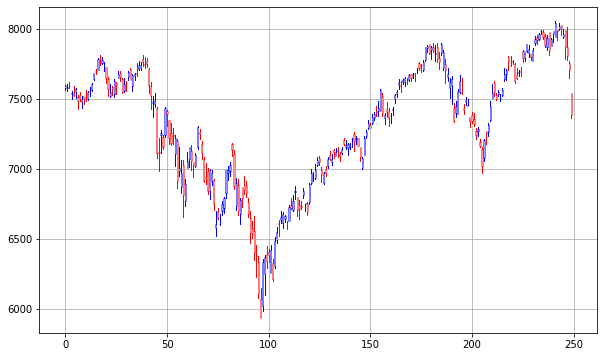

Peer closed connection


In [29]:
util.barplot(hist_cont);

In [20]:
contract = ContFuture('gc', exchange='NYMEX')

In [21]:
ib.reqContractDetails(contract)

[ContractDetails(contract=Contract(secType='CONTFUT', conId=141194655, symbol='GC', lastTradeDateOrContractMonth='20191227', multiplier='100', exchange='NYMEX', currency='USD', localSymbol='GCZ9', tradingClass='GC'), marketName='GC', minTick=0.1, orderTypes='ACTIVETIM,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,BASKET,BENCHPX,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,ICE,IOC,LIT,LMT,LTH,MIT,MKT,MTL,NGCOMB,NONALGO,OCA,PEGBENCH,SCALE,SCALERST,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='NYMEX', priceMagnifier=1, underConId=17340718, longName='Gold', contractMonth='201912', timeZoneId='EST5EDT', tradingHours='20190905:1800-20190906:1700;20190907:CLOSED;20190908:1800-20190909:1700;20190909:1800-20190910:1700;20190910:1800-20190911:1700;20190911:1800-20190912:1700;20190912:1800-20190913:1700;20190914:CLOSED;20190915:1800-20190916:1700;20190916:1800-20190917:1700;20190917:1800-20190918:1700;20190918:1800-20190919:1700;20190919:1800-201

In [6]:
ib.disconnect()

In [15]:
pd.read_pickle('minute_CL_cont_non_active_included.pickle')

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-09-21 00:00:00,70.20,70.23,70.18,70.23,136,70.211,58
2018-09-21 00:01:00,70.23,70.24,70.22,70.24,77,70.229,36
2018-09-21 00:02:00,70.24,70.24,70.22,70.22,42,70.227,24
2018-09-21 00:03:00,70.23,70.23,70.22,70.22,7,70.224,6
2018-09-21 00:04:00,70.23,70.24,70.22,70.24,18,70.232,11
2018-09-21 00:05:00,70.24,70.26,70.24,70.26,93,70.253,56
2018-09-21 00:06:00,70.26,70.26,70.25,70.26,35,70.260,24
2018-09-21 00:07:00,70.27,70.28,70.26,70.27,54,70.271,28
2018-09-21 00:08:00,70.27,70.28,70.26,70.26,47,70.268,22
